In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [3]:
# Importing Data
%store -r float_imdb
%store -r obj_imdb

In [ ]:
# This notebook is designed to test different dependent variables to uncover what the most important features are for that
# specific demograph.
# What is displayed below is a model for the females_30age_avg_vote

In [4]:
float_imdb.columns

Index(['year', 'duration', 'avg_vote', 'votes', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes',
       'females_allages_avg_vote', 'females_allages_votes',
       'females_0age_avg_vote', 'females_0age_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vot

In [5]:
females_30_float_imdb = float_imdb[['metascore','females_30age_avg_vote']]
females_30_float_imdb.head()

,metascore,females_30age_avg_vote
0,0.0,6.0
1,0.0,5.8
2,0.0,5.5
3,0.0,7.3
4,0.0,4.8


In [7]:
obj_imdb.columns

Index(['Brahmanandam', 'Anupam Kher', 'Nassar', 'Eric Roberts', 'Prakash Raj',
       'Amitabh Bachchan', 'Gérard Depardieu', 'Mohanlal', 'Tanikella Bharani',
       'John Carradine',
       ...
       'Avala Film', 'Nordisk Film', 'Hammer Films', 'BBC Films', 'Lionsgate',
       'Kinostudiya imeni M. Gorkogo', 'Orion Pictures',
       'Bandai Visual Company', 'EuropaCorp', 'Dimension Films'],
      dtype='object', length=272)

In [8]:
females30_obj_imdb = pd.concat([females_30_float_imdb, obj_imdb], axis=1)
females30_obj_imdb.head(2)

,metascore,females_30age_avg_vote,Brahmanandam,Anupam Kher,Nassar,Eric Roberts,Prakash Raj,Amitabh Bachchan,Gérard Depardieu,Mohanlal,...,Avala Film,Nordisk Film,Hammer Films,BBC Films,Lionsgate,Kinostudiya imeni M. Gorkogo,Orion Pictures,Bandai Visual Company,EuropaCorp,Dimension Films
0,0.0,6.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,5.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
len(females30_obj_imdb)

81273

In [59]:
X_3 = females30_obj_imdb.iloc[0:]
X_3 = X_3.drop(['females_30age_avg_vote'], axis=1)

X_3.head(2)

,metascore,Brahmanandam,Anupam Kher,Nassar,Eric Roberts,Prakash Raj,Amitabh Bachchan,Gérard Depardieu,Mohanlal,Tanikella Bharani,...,Avala Film,Nordisk Film,Hammer Films,BBC Films,Lionsgate,Kinostudiya imeni M. Gorkogo,Orion Pictures,Bandai Visual Company,EuropaCorp,Dimension Films
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
Y_3 = females30_obj_imdb.iloc[0:, 1]

Y_3.head(2)

0    6.0
1    5.8
Name: females_30age_avg_vote, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_3, Y_3, test_size=0.33, random_state=42)

In [62]:
model_f = XGBClassifier()

In [63]:
model_f.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
# Make predictions on model
y_pred = model_f.predict(X_test)

In [65]:
# Compute RMSE 1.89996
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Root Mean Squared Error: 1.89996


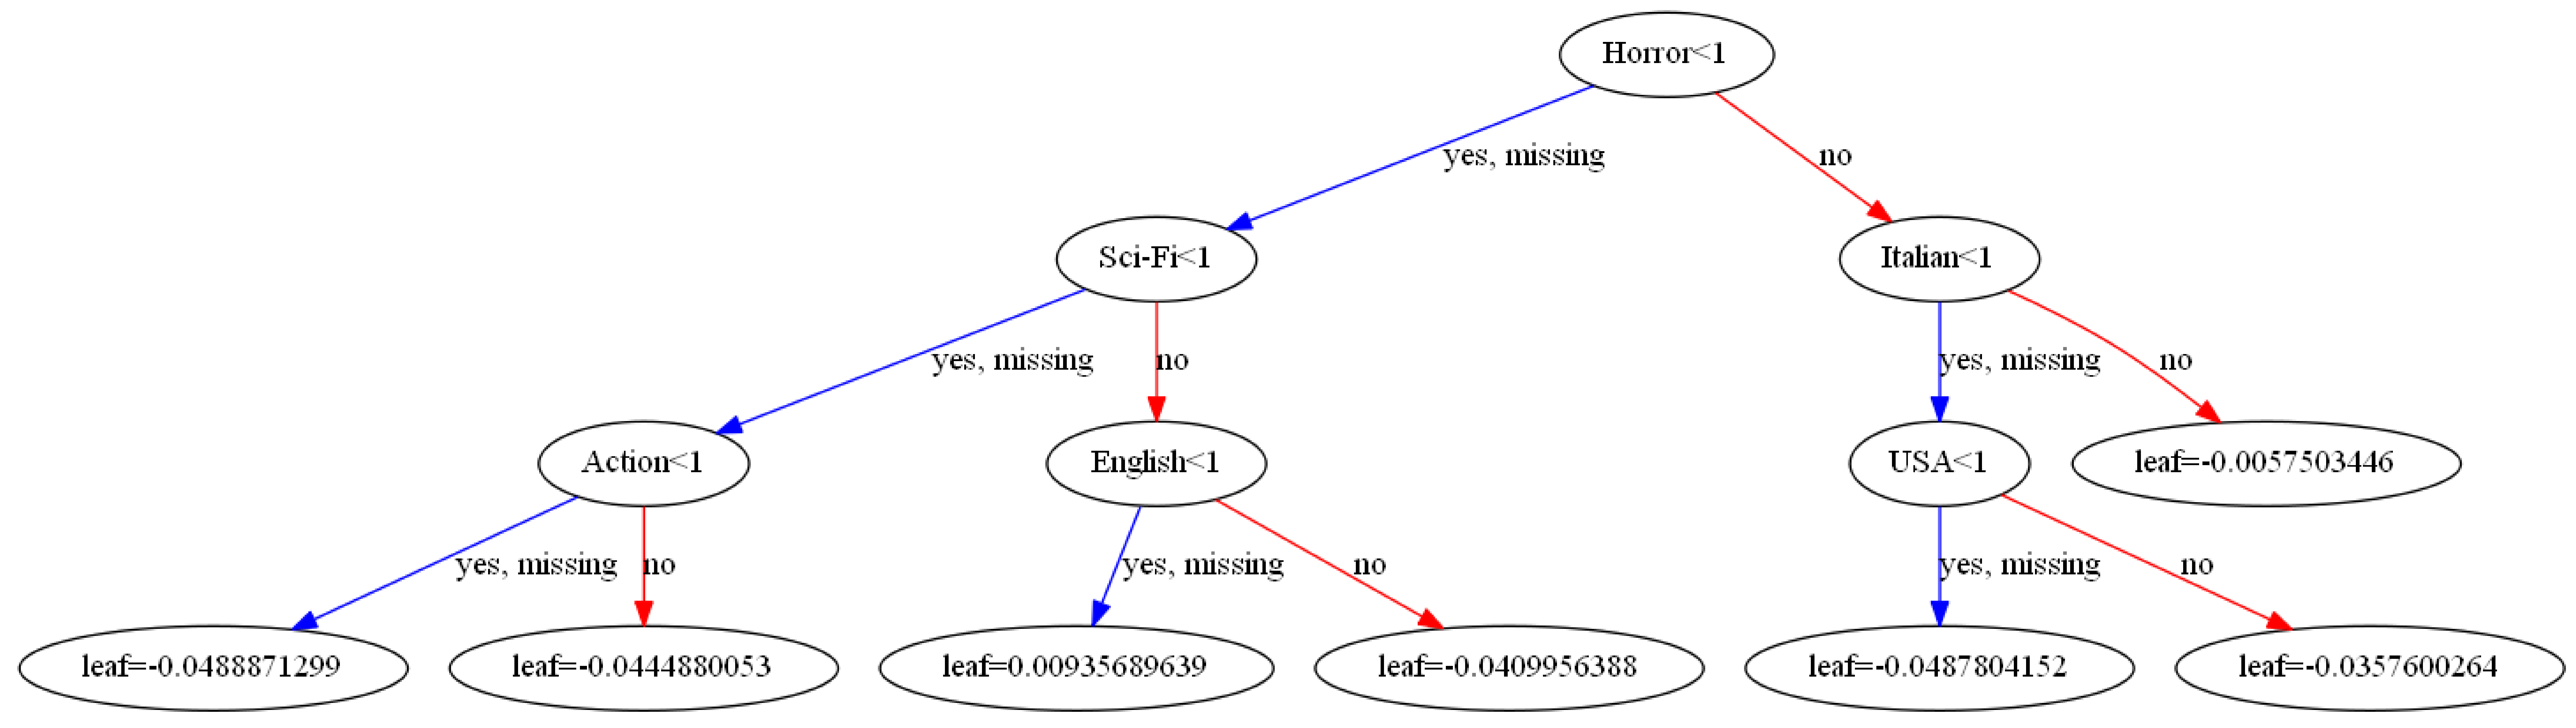

In [83]:
# Visualizing the decision tree
plot_tree(model_f, num_trees=97)
fig = plt.gcf()
fig.set_size_inches(150, 100)

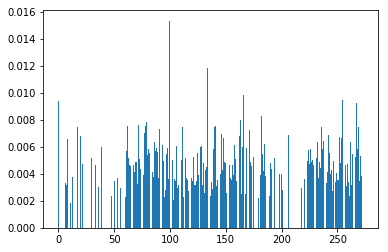

In [69]:
plt.bar(range(len(model_f.feature_importances_)), model_f.feature_importances_)
plt.show()

In [70]:
# 100 is Crime
# 118 is UK
# 134 is Denmark
# 166 is Javed Akhtar
# 255 is Millennium Films

feature = pd.DataFrame(model_f.feature_importances_)
feature.columns=['importance']
feature.sort_values(by=['importance'], ascending=False).head(5)

,importance
100,0.015322
118,0.014427
134,0.011857
166,0.009832
255,0.009480


In [75]:
females30_obj_imdb.iloc[0:1, 255]

0    0
Name: Millennium Films, dtype: int32